## Importación de librerías

In [1]:
import os 
os.chdir(os.path.dirname(os.getcwd())) # Change working directory to parent directory

In [2]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from test_harness.datasets.dataset import Dataset
from test_harness.experiments._1_baseline_experiment import BaselineExperiment
from test_harness.experiments._2_response_uncertainty_experiment import UncertaintyKSExperiment
from test_harness.experiments._3_margin_uncertainty_experiment import UncertaintyX2Experiment
from test_harness.experiments._4_margin_threshold_experiment import MarginThresholdExperiment
from test_harness.experiments._5_topline_experiment import ToplineExperiment

from test_harness.utils.utils import (
    plot_experiment_error,
    plot_multiple_experiments,
    aggregate_experiment_metrics,
    plot_KS_drift_distributions,
    plot_XS_drift_margin_distributions
)

import matplotlib.pyplot as plt

%matplotlib inline

## Preparación de los experimentos

In [3]:
def define_run_exps(model, param_grid, dataset, delete_csv=False):

    exps = []

    # baseline experiment
    baseline = BaselineExperiment(model=model, dataset=dataset, param_grid=param_grid, delete_csv=delete_csv)
    # print("Running baseline experiment")
    baseline.run()
    exps.append(baseline)

    # response uncertainty experiment
    uncertainty_ks = UncertaintyKSExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.001,
        delete_csv=delete_csv
    )
    # print("Running response uncertainty experiment")
    uncertainty_ks.run()
    exps.append(uncertainty_ks)
    
    # margin uncertainty experiment
    uncertainty_x2 = UncertaintyX2Experiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.01,
        margin_width=0.2,
        delete_csv=delete_csv
    )
    # print("Running margin uncertainty experiment")
    uncertainty_x2.run()
    exps.append(uncertainty_x2)
    
    # margin threshold experiment (sensitivity = 0.5)
    margin_threshold_1 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=0.5,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=0.5")
    margin_threshold_1.run()
    exps.append(margin_threshold_1)

    # margin threshold experiment (sensitivity = 1)
    margin_threshold_2 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=1,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=1")
    margin_threshold_2.run()
    exps.append(margin_threshold_2)

    # topline experiment
    topline = ToplineExperiment(
        model=model,
        dataset=dataset,
        k=5,
        param_grid=param_grid,
        delete_csv=delete_csv
    )
    # print("Running topline experiment")
    topline.run()
    exps.append(topline)
    
    return exps  

## Carga de datos y ejecución de experimentos

### Stagger - abrupto

In [4]:
# Load data
change_points = [10000]

column_mapping = {
    "target": "target",
    "int_features": ["size", "color", "shape"],
    "float_features": [],
}

dataset_stagger_abr = pd.read_csv("./datasets/_10_data_stagger_abrupto.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


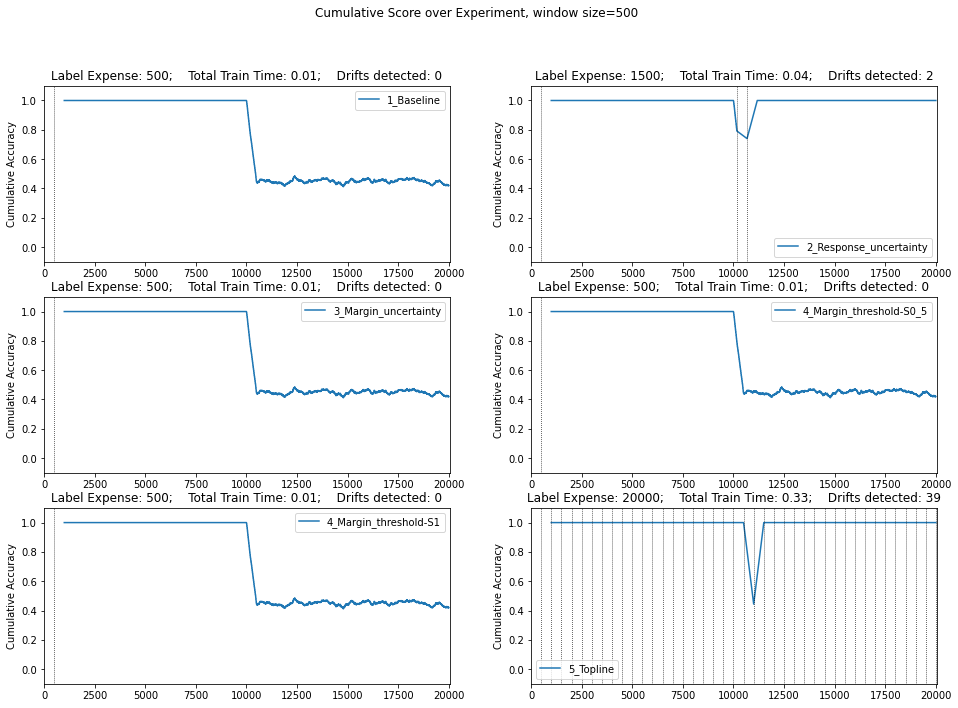

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.025,0,0,0,0,0.42,0.00
2_Response_uncertainty,0.04,0.075,2,2,1,1,1.00,0.50
3_Margin_uncertainty,0.01,0.025,0,20,0,20,0.42,0.00
4_Margin_threshold-S0_5,0.01,0.025,0,20,0,20,0.42,0.00
4_Margin_threshold-S1,0.01,0.025,0,20,0,20,0.42,0.00
5_Topline,0.33,1.000,39,1,38,0,1.00,0.05


Running experiments with window size = 1500


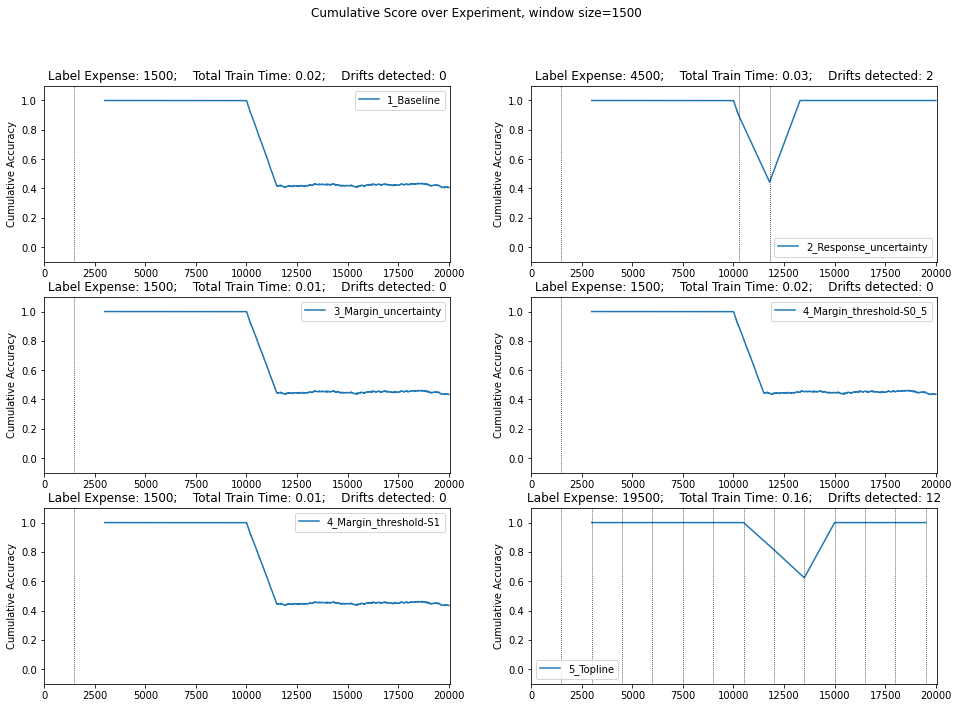

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.407100,0.000000
2_Response_uncertainty,0.03,0.225,2,2,1,1,1.000000,0.500000
3_Margin_uncertainty,0.01,0.075,0,7,0,7,0.435333,0.000000
4_Margin_threshold-S0_5,0.02,0.075,0,7,0,7,0.435333,0.000000
4_Margin_threshold-S1,0.01,0.075,0,7,0,7,0.435333,0.000000
5_Topline,0.16,0.975,12,1,11,0,1.000000,0.153846


Running experiments with window size = 2500


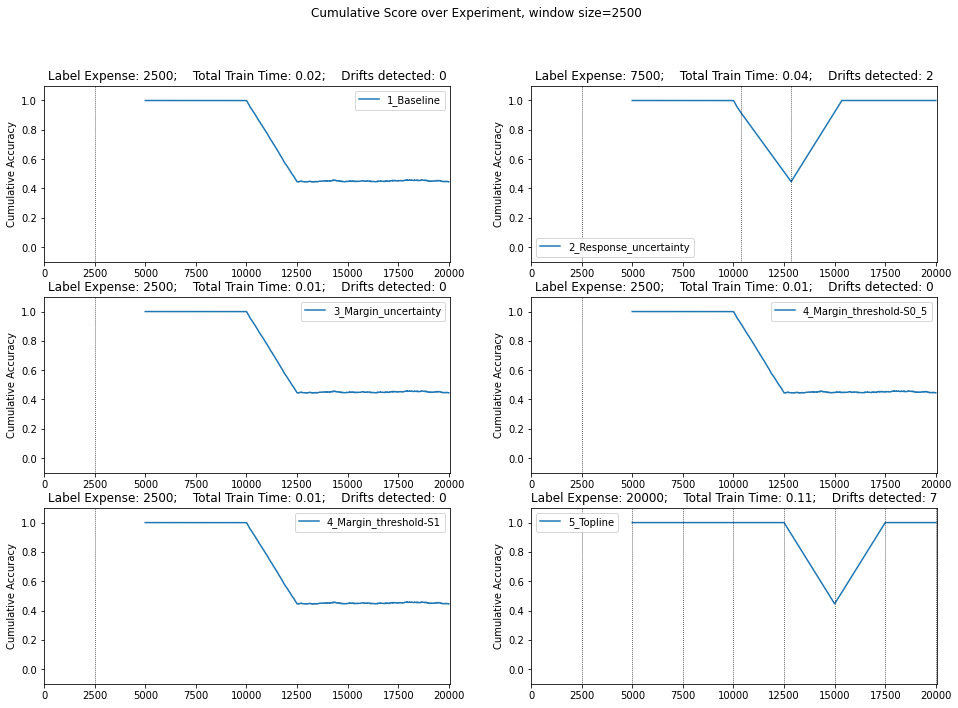

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.125,0,0,0,0,0.4452,0.00
2_Response_uncertainty,0.04,0.375,2,2,1,1,1.0000,0.50
3_Margin_uncertainty,0.01,0.125,0,4,0,4,0.4452,0.00
4_Margin_threshold-S0_5,0.01,0.125,0,4,0,4,0.4452,0.00
4_Margin_threshold-S1,0.01,0.125,0,4,0,4,0.4452,0.00
5_Topline,0.11,1.000,7,1,6,0,1.0000,0.25


Running experiments with window size = 3500


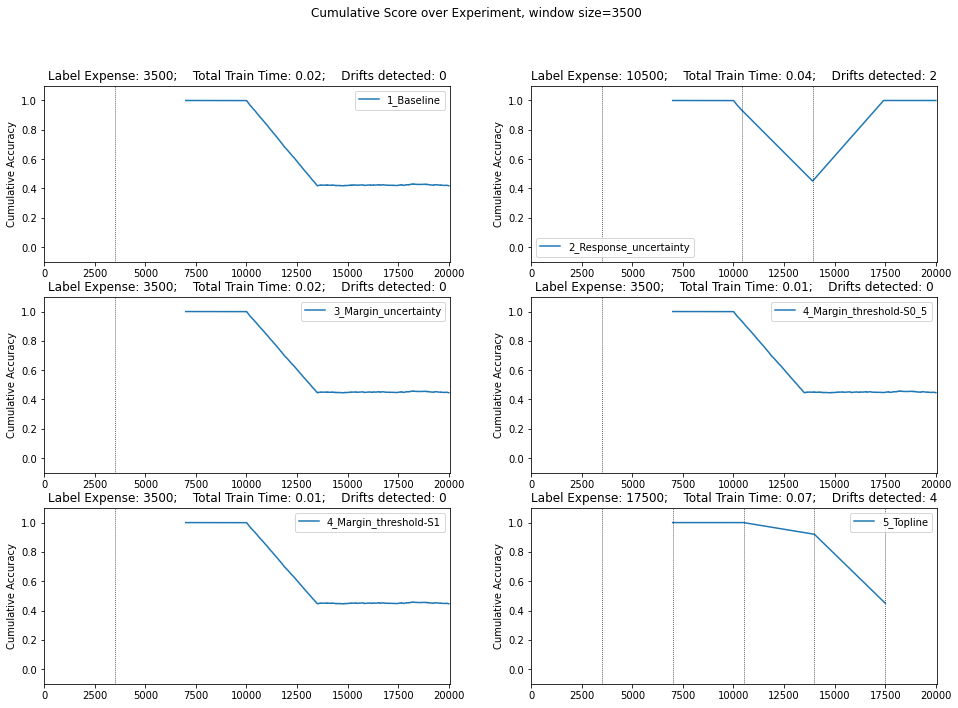

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.175,0,0,0,0,0.418600,0.0
2_Response_uncertainty,0.04,0.525,2,2,1,1,1.000000,0.5
3_Margin_uncertainty,0.02,0.175,0,3,0,3,0.446286,0.0
4_Margin_threshold-S0_5,0.01,0.175,0,3,0,3,0.446286,0.0
4_Margin_threshold-S1,0.01,0.175,0,3,0,3,0.446286,0.0
5_Topline,0.07,0.875,4,1,3,0,0.450000,0.4


In [5]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_10_data_stagger_abrupto"
    dataset_10 = Dataset(name_ds, full_df=dataset_stagger_abr, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_10.window_size}")
    exps = define_run_exps(model, param_grid, dataset_10, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_10.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


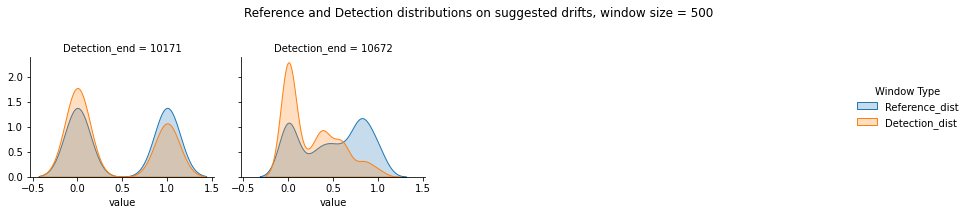

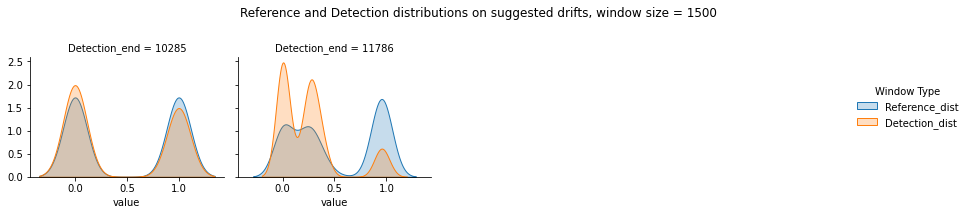

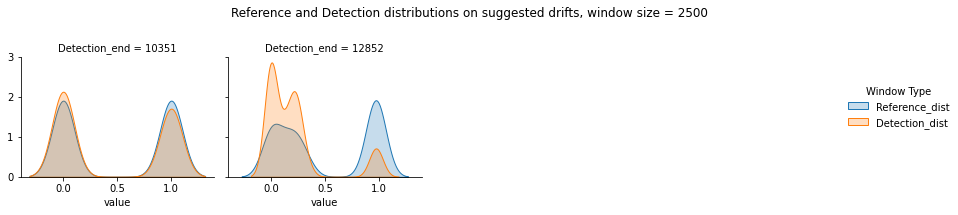

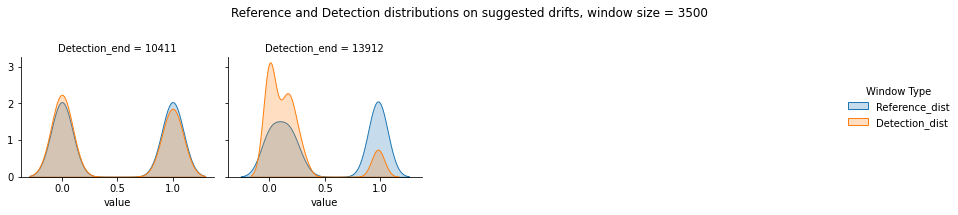

In [6]:
results_KS = pd.read_csv("./results/_10_data_stagger_abrupto_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

In [7]:
results_XS = pd.read_csv("./results/_10_data_stagger_abrupto_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


### Stagger - recurrente

In [8]:
# Load data
change_points = [5000,10000,15000]

column_mapping = {
    "target": "target",
    "int_features": ["size", "color", "shape"],
    "float_features": [],
}

dataset_stagger_rec = pd.read_csv("./datasets/_11_data_stagger_recurrente.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


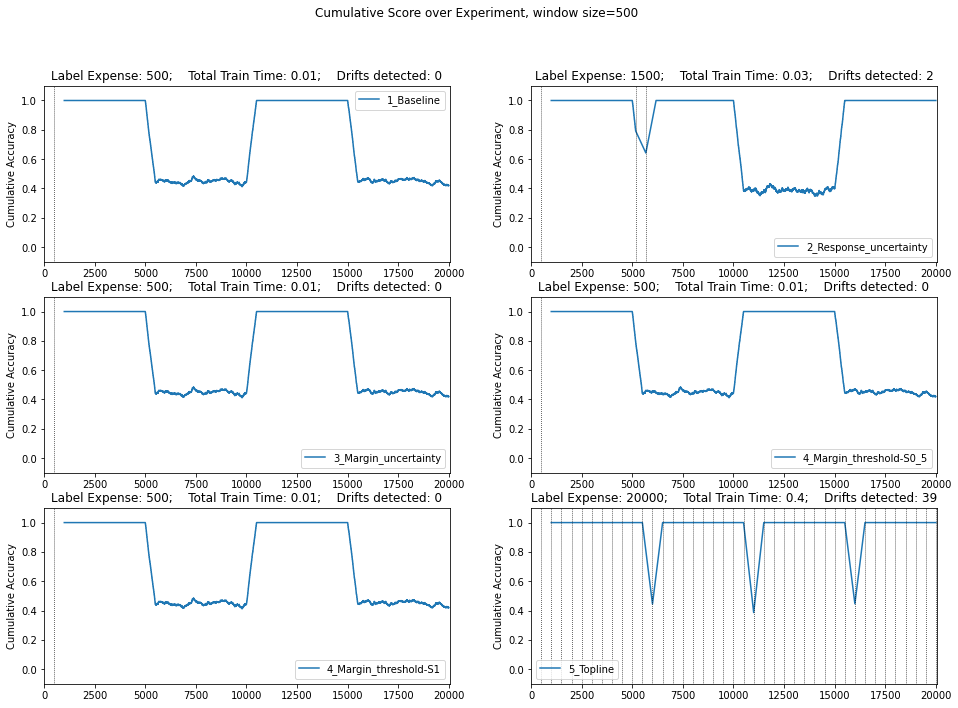

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.025,0,0,0,0,0.42,0.000000
2_Response_uncertainty,0.03,0.075,2,13,1,12,1.00,0.133333
3_Margin_uncertainty,0.01,0.025,0,21,0,21,0.42,0.000000
4_Margin_threshold-S0_5,0.01,0.025,0,21,0,21,0.42,0.000000
4_Margin_threshold-S1,0.01,0.025,0,21,0,21,0.42,0.000000
5_Topline,0.40,1.000,39,3,36,0,1.00,0.142857


Running experiments with window size = 1500


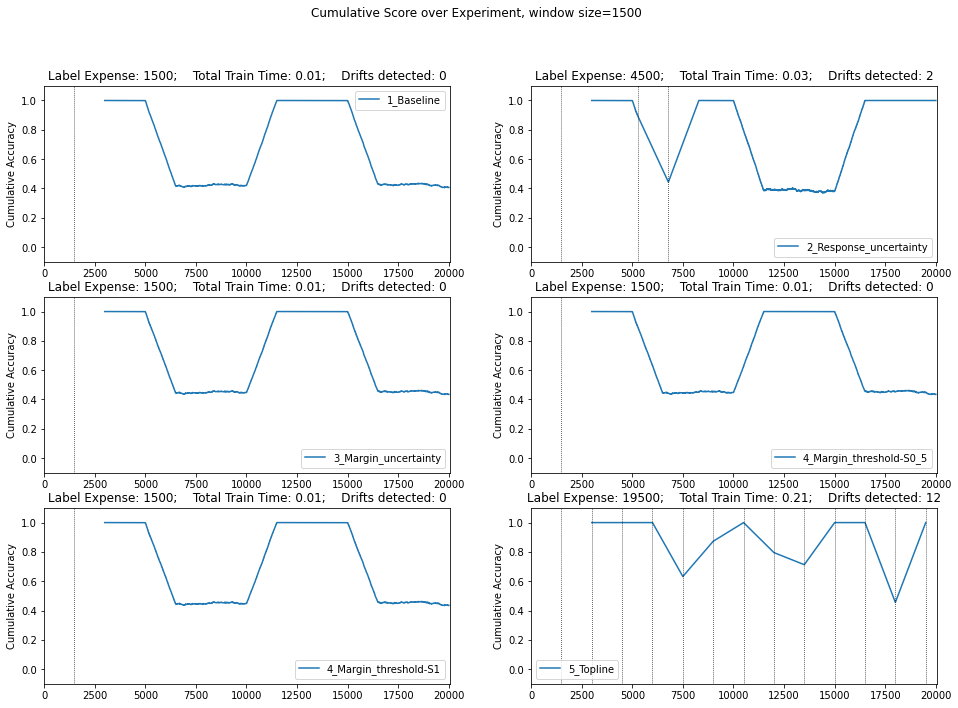

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.075,0,0,0,0,0.407100,0.000000
2_Response_uncertainty,0.03,0.225,2,7,1,6,1.000000,0.222222
3_Margin_uncertainty,0.01,0.075,0,9,0,9,0.435333,0.000000
4_Margin_threshold-S0_5,0.01,0.075,0,9,0,9,0.435333,0.000000
4_Margin_threshold-S1,0.01,0.075,0,9,0,9,0.435333,0.000000
5_Topline,0.21,0.975,12,3,9,0,1.000000,0.400000


Running experiments with window size = 2500


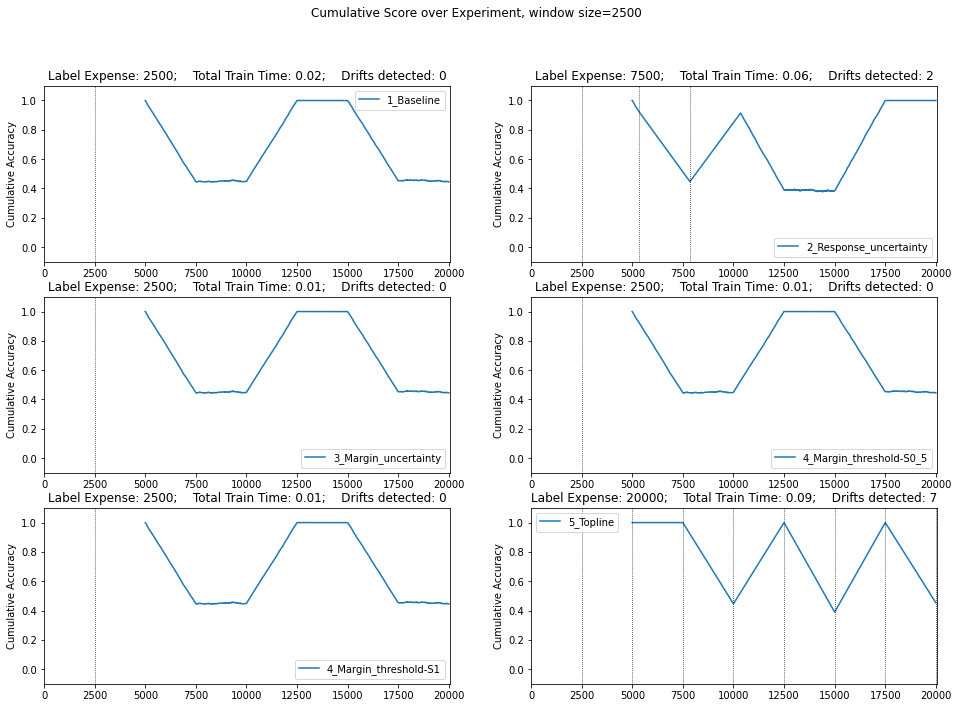

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.125,0,0,0,0,0.4452,0.000000
2_Response_uncertainty,0.06,0.375,2,5,1,4,1.0000,0.285714
3_Margin_uncertainty,0.01,0.125,0,5,0,5,0.4452,0.000000
4_Margin_threshold-S0_5,0.01,0.125,0,5,0,5,0.4452,0.000000
4_Margin_threshold-S1,0.01,0.125,0,5,0,5,0.4452,0.000000
5_Topline,0.09,1.000,7,3,4,0,0.4528,0.600000


Running experiments with window size = 3500


C:\Users\UOC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


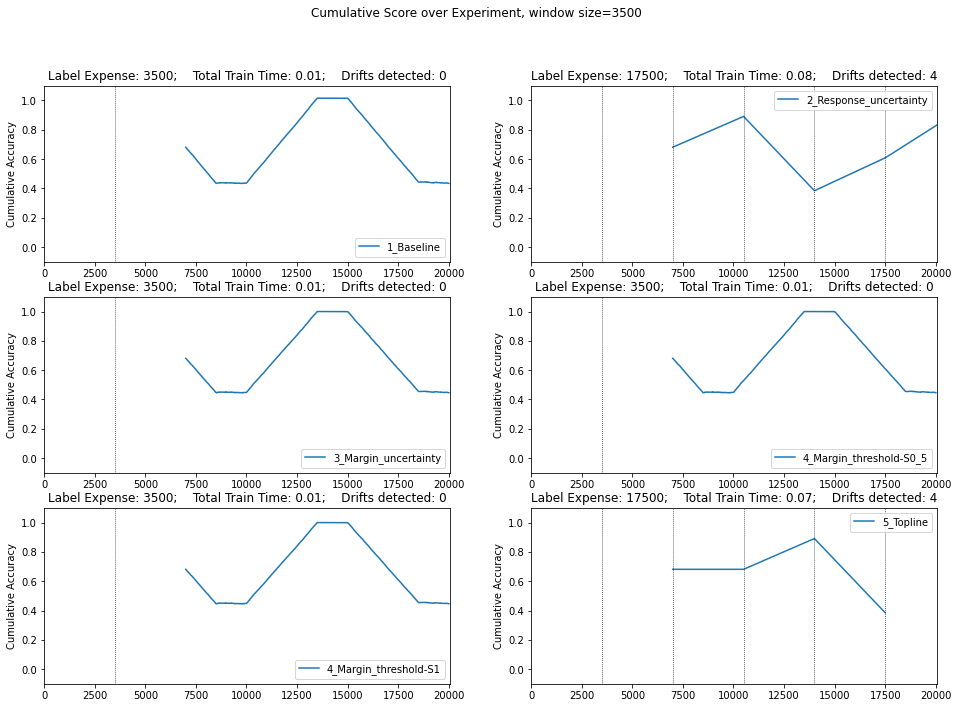

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.175,0,0,0,0,0.434543,0.000000
2_Response_uncertainty,0.08,0.875,4,2,2,0,0.915899,0.666667
3_Margin_uncertainty,0.01,0.175,0,4,0,4,0.446286,0.000000
4_Margin_threshold-S0_5,0.01,0.175,0,4,0,4,0.446286,0.000000
4_Margin_threshold-S1,0.01,0.175,0,4,0,4,0.446286,0.000000
5_Topline,0.07,0.875,4,2,2,0,0.384571,0.666667


In [9]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_11_data_stagger_recurrente"
    dataset_11 = Dataset(name_ds, full_df=dataset_stagger_rec, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_11.window_size}")
    exps = define_run_exps(model, param_grid, dataset_11, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_11.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


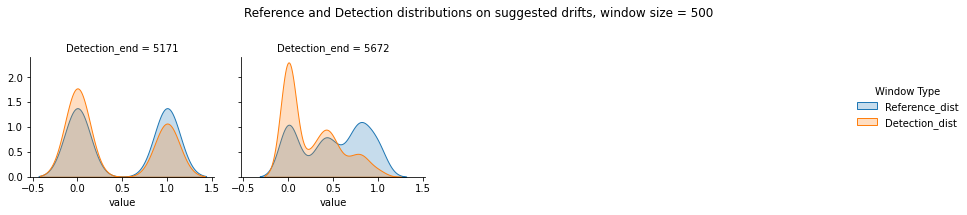

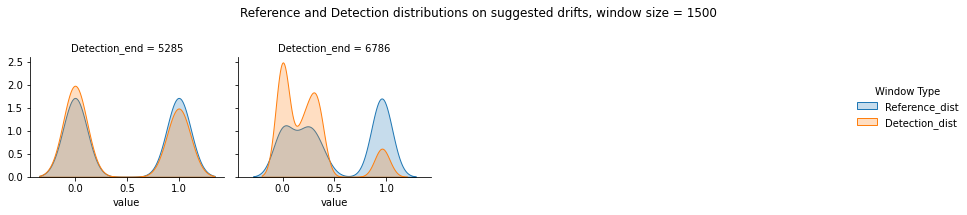

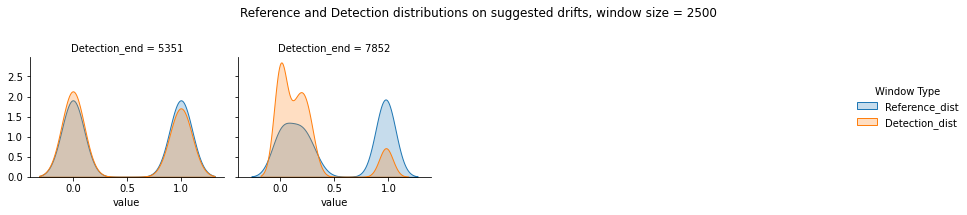

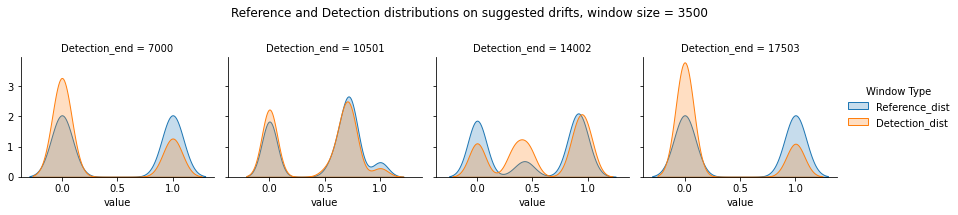

In [10]:
results_KS = pd.read_csv("./results/_11_data_stagger_recurrente_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

In [11]:
results_XS = pd.read_csv("./results/_11_data_stagger_recurrente_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


### Stagger - Gradual

In [12]:
# Load data
change_points = [9750]

column_mapping = {
    "target": "target",
    "int_features": ["size", "color", "shape"],
    "float_features": [],
}

dataset_stagger_grad = pd.read_csv("./datasets/_12_data_stagger_gradual.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


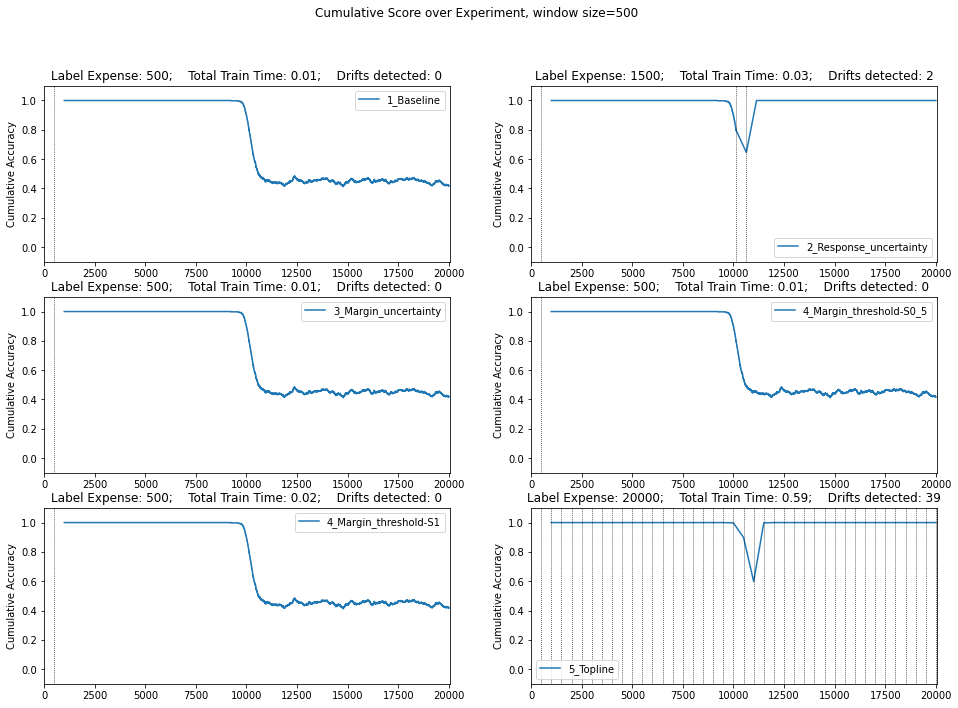

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.025,0,0,0,0,0.416,0.000000
2_Response_uncertainty,0.03,0.075,2,3,1,2,1.000,0.400000
3_Margin_uncertainty,0.01,0.025,0,22,0,22,0.416,0.000000
4_Margin_threshold-S0_5,0.01,0.025,0,22,0,22,0.416,0.000000
4_Margin_threshold-S1,0.02,0.025,0,22,0,22,0.416,0.000000
5_Topline,0.59,1.000,39,2,37,0,1.000,0.097561


Running experiments with window size = 1500


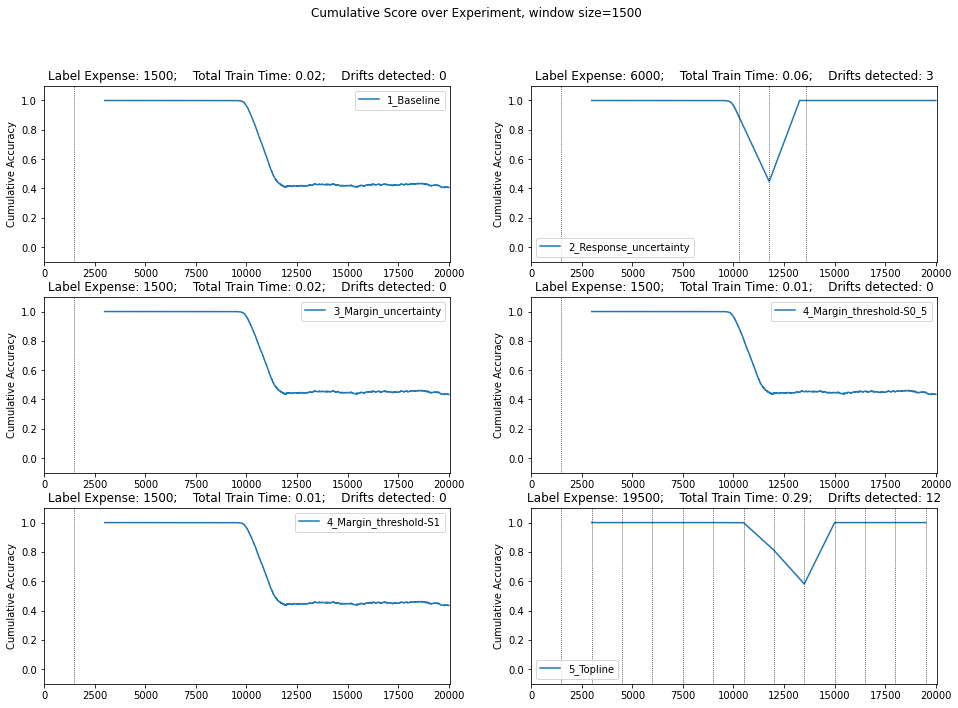

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.407100,0.000000
2_Response_uncertainty,0.06,0.300,3,2,2,1,1.000000,0.400000
3_Margin_uncertainty,0.02,0.075,0,8,0,8,0.435333,0.000000
4_Margin_threshold-S0_5,0.01,0.075,0,8,0,8,0.435333,0.000000
4_Margin_threshold-S1,0.01,0.075,0,8,0,8,0.435333,0.000000
5_Topline,0.29,0.975,12,1,11,0,1.000000,0.153846


Running experiments with window size = 2500


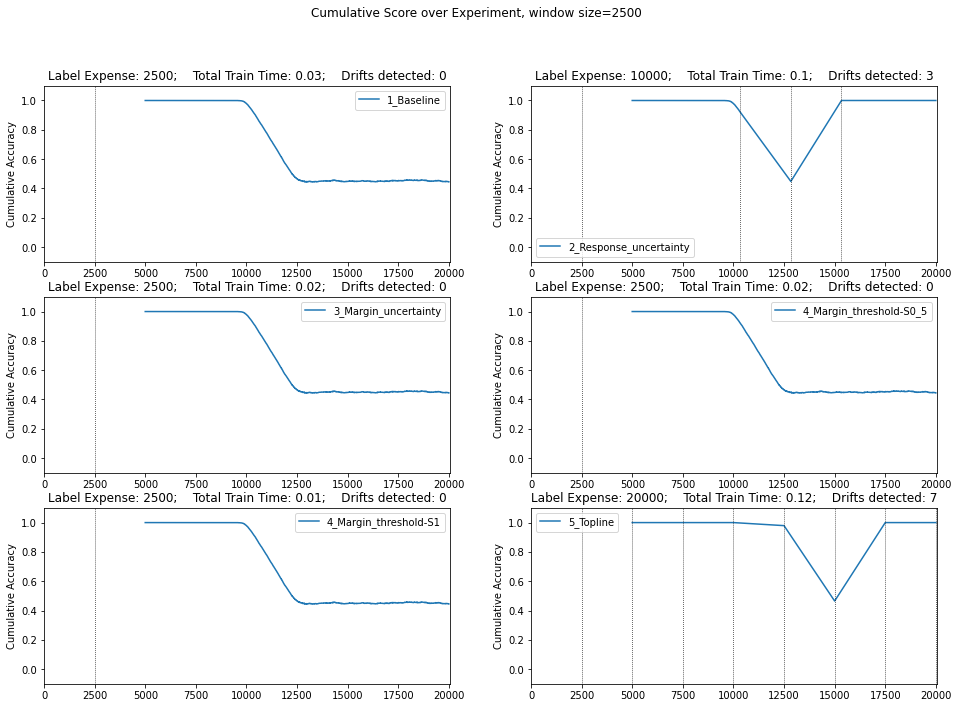

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.125,0,0,0,0,0.4444,0.000000
2_Response_uncertainty,0.10,0.500,3,2,2,1,1.0000,0.400000
3_Margin_uncertainty,0.02,0.125,0,5,0,5,0.4444,0.000000
4_Margin_threshold-S0_5,0.02,0.125,0,5,0,5,0.4444,0.000000
4_Margin_threshold-S1,0.01,0.125,0,5,0,5,0.4444,0.000000
5_Topline,0.12,1.000,7,2,5,0,1.0000,0.444444


Running experiments with window size = 3500


C:\Users\UOC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


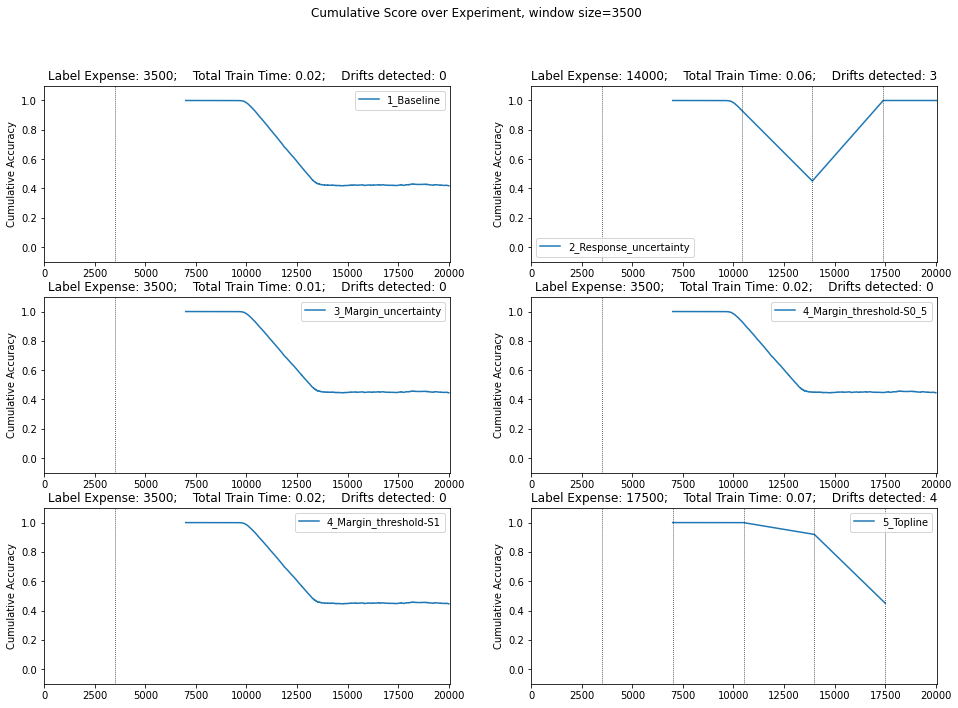

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.175,0,0,0,0,0.418000,0.0
2_Response_uncertainty,0.06,0.700,3,2,2,1,1.000000,0.4
3_Margin_uncertainty,0.01,0.175,0,4,0,4,0.445714,0.0
4_Margin_threshold-S0_5,0.02,0.175,0,4,0,4,0.445714,0.0
4_Margin_threshold-S1,0.02,0.175,0,4,0,4,0.445714,0.0
5_Topline,0.07,0.875,4,1,3,0,0.450000,0.4


In [13]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_12_data_stagger_gradual"
    dataset_12 = Dataset(name_ds, full_df=dataset_stagger_grad, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_12.window_size}")
    exps = define_run_exps(model, param_grid, dataset_12, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_12.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


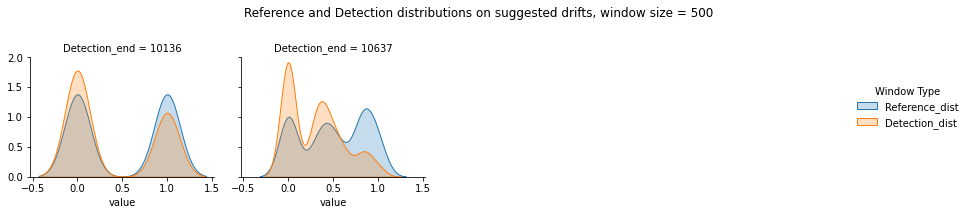

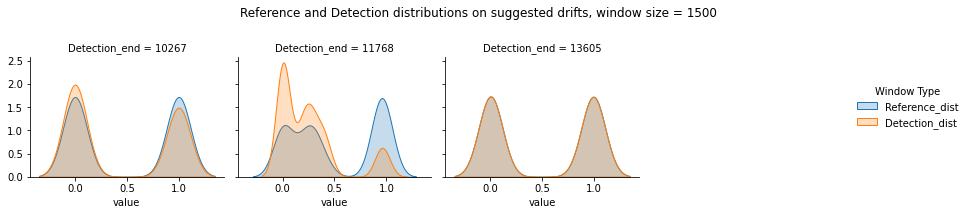

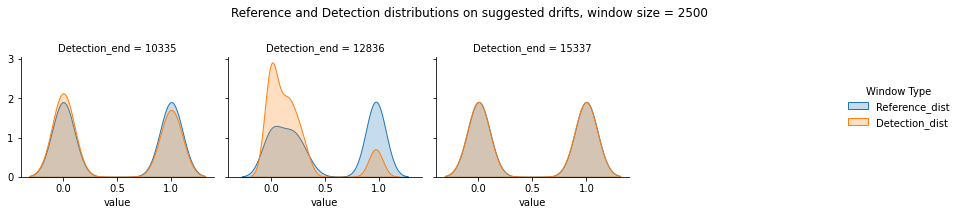

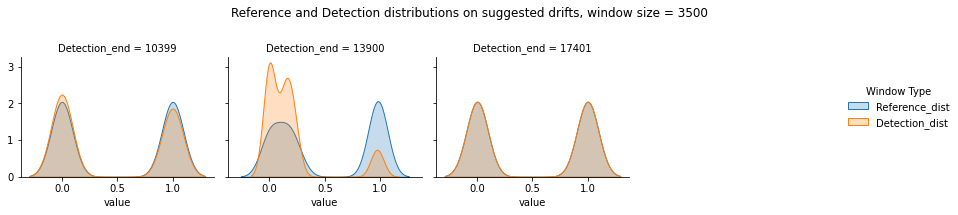

In [14]:
results_KS = pd.read_csv("./results/_12_data_stagger_gradual_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

In [15]:
results_XS = pd.read_csv("./results/_12_data_stagger_gradual_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:
